# Tarea 1 INF 395

Para las tareas se utilizará `Keras`, una libreria de Deep Learning de alto nivel para Python, con el reciente anuncio de Keras Core, uno puede escoger el backend de su preferencia, ya sea Pytorch, Tensorflow o JAX.

Para más Información pueden revisar la documentación oficial de Keras: https://keras.io/

In [1]:
#Para utilizar keras-core primero hay que instalar tensorflow o pytorch o jax
#pip install tensorflow

# una vez instalado nuestro backend podemos instalar keras-core
#Se recomienda correr el jupyter notebook en colab, ya que tiene acceso gratis a GPUS y también tiene ya instalado tensorflow, pytorch y jax, solo hace falta instalar keras-core.
!pip install -q keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 13.7 MB/s eta 0:00:00


## Integrantes:

* Nombre: Christopher Silva
* Nombre: Sebastian Salazar
* Nombre: Juan Suárez

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import seaborn as sns
import os
import io

# Aquí se escoge el backend de keras
os.environ["KERAS_BACKEND"] = "tensorflow" # 'torch', 'tensorflow', 'jax'

import keras_core as keras

SEED = 42
keras.utils.set_random_seed(SEED)

Using TensorFlow backend


In [89]:
def plot_losses_v2(history, loss):
  "Función para graficar la función de pérdida del modelo [modificada]"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel("loss")
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

## Helper Functions

In [ ]:
def viz_imgs(imgs, labels):
  "Función para visualizar imágenes junto a sus labels"
  plt.figure(figsize=(10,10))
  random_inds = np.random.choice(imgs.shape[0],36)
  for i in range(36):
      plt.subplot(6,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      image_ind = random_inds[i]
      plt.imshow(np.squeeze(imgs[image_ind]), cmap=plt.cm.binary)
      plt.xlabel(labels[image_ind])

In [28]:
def plot_losses(history, loss):
  "Función para graficar la función de pérdida del modelo"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel(loss.name)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [30]:
def plot_losses_v2(history, loss):
  "Función para graficar la función de pérdida del modelo [modificada]"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel("loss")
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
def plot_cm(y_pred, y_test):
  "Función para graficar matriz de confusión"
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  cm_display = ConfusionMatrixDisplay(cm).plot()

## Parte 1: Demostración del uso de Keras

### 1.1 Mnist

Mnist es un dataset de imágenes de dígitos escritos a mano. Cada imagen es de 28x28 pixeles y está en escala de grises. El dataset está dividido en 60.000 imágenes de entrenamiento y 10.000 imágenes de testeo.

In [ ]:
#Cargamos el Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Exploración de los Datos

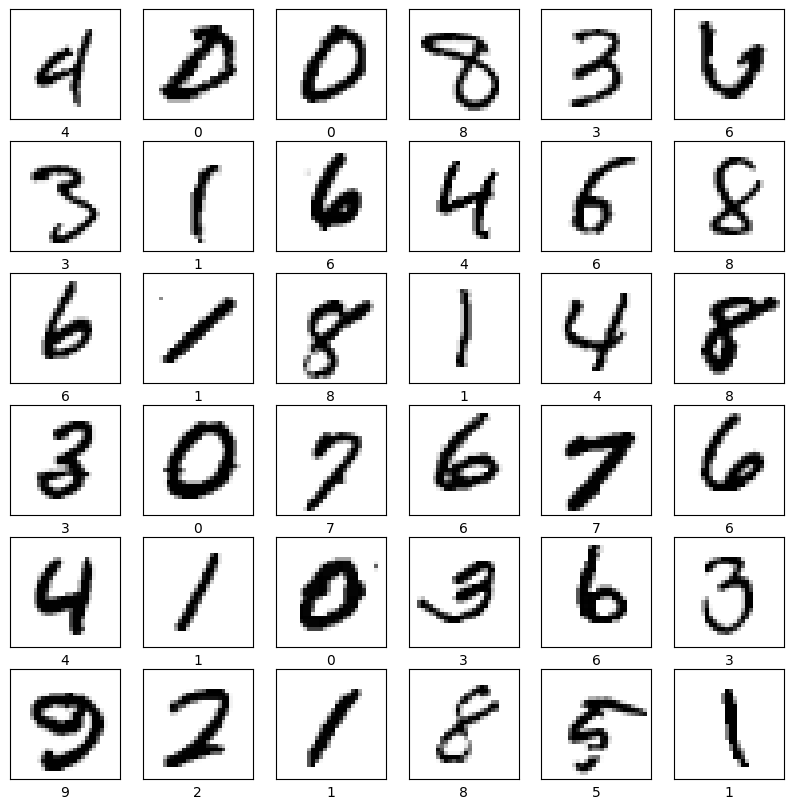

In [ ]:
# Visualizamos algunas imágenes y sus clases
viz_imgs(x_train, y_train)

In [ ]:
#Descripción de los datos
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]

print('cantidad de clases:', num_classes)
print('Dimension de los datos:', input_shape)

cantidad de clases: 10
Dimension de los datos: (28, 28)


#### One Hot Encoding

In [ ]:
# convertimos los vectores de clases a matrices binarias
print('antes:\n',y_train)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\nDespues:\n',y_train)

antes:
 [5 0 4 ... 5 6 8]

Despues:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Arquitectura de la red

In [ ]:
#Un modelo simple de redes neuronales FeedForward
inputs = keras.Input(shape=input_shape)
# print(inputs)
x = keras.layers.Flatten()(inputs)
# print(x)
x =  keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 784)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 128)               │    100,480 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

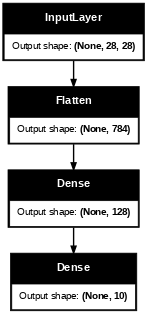

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

#### Definición de hiperparámetros

In [ ]:
# definimos algunos hiperparámetros
batch_size = 128        #cantidad de imágenes por batch
epochs = 20             #cantidad de epochs
validation_split = 0.2  #Porcentaje de data destinada a validación

In [ ]:
#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.SGD(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

#### Entrenamiento del Modelo

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6077 - loss: 17.2967 - val_accuracy: 0.7898 - val_loss: 1.0557
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7962 - loss: 0.9616 - val_accuracy: 0.8378 - val_loss: 0.7853
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8409 - loss: 0.6901 - val_accuracy: 0.8591 - val_loss: 0.6569
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8647 - loss: 0.5500 - val_accuracy: 0.8724 - val_loss: 0.5855
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8799 - loss: 0.4683 - val_accuracy: 0.8839 - val_loss: 0.5360
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8914 - loss: 0.4117 - val_accuracy: 0.8911 - val_loss: 0.5022
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9014 - loss: 0.3691 - val_accuracy: 0.8976 - val_loss: 0.4756
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9085 - loss: 0.3359 - val_accuracy

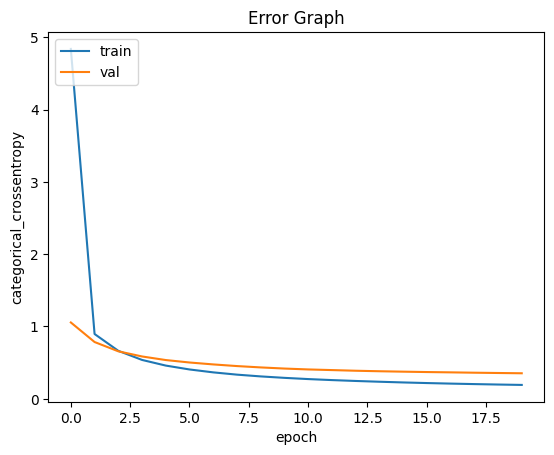

In [ ]:
plot_losses(history, loss)

#### Evaluación del Modelo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 1s - 2ms/step - accuracy: 0.9214 - loss: 0.3680
Test loss: 0.36804887652397156
Test accuracy: 0.9214000105857849


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


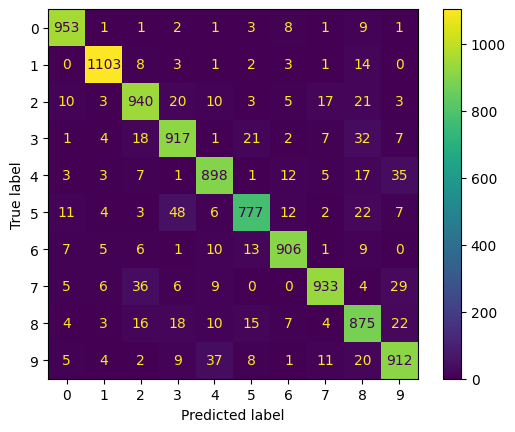

In [ ]:
# Graficamos la matriz de confusión
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

### 1.2.1 Cifar10

Cifar10 es un dataset de imágenes de 32x32 pixeles, que contiene 10 clases distintas. Este dataset es muy utilizado para probar algoritmos de clasificación de imágenes. En este caso, utilizaremos una versión reducida de este dataset, que contiene 50000 imágenes de entrenamiento y 10000 imágenes de testeo, con 100 imágenes por clase. Las clases son: 'avión', 'automóvil', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco' y 'camión'.

In [ ]:
#Cargamos el Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [ ]:
#Visualizamos si el dataset es balanceado o no.
pd.value_counts(pd.Series(y_train.reshape(-1)))

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


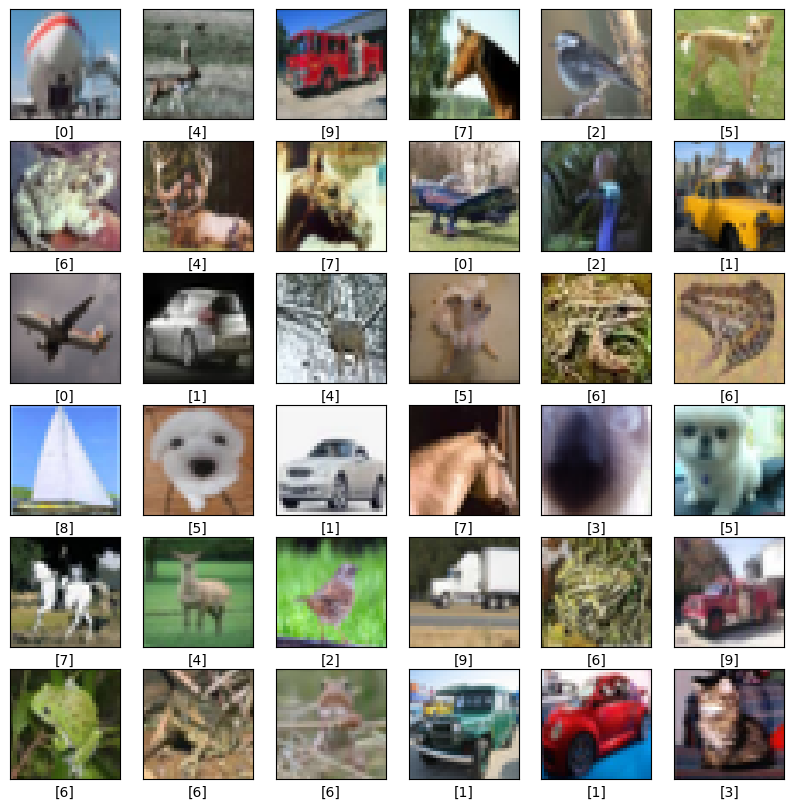

In [ ]:
# Visualizamos algunas imágenes y sus clases
viz_imgs(x_train, y_train)

In [ ]:
#Descripción de los datos
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]

print('cantidad de imágenes:',x_train.shape[0])
print('Dimensión de los datos:',input_shape)
print('Tipo de Datos:',x_train.dtype)
print('cantidad de clases:', num_classes)

cantidad de imágenes: 50000
Dimensión de los datos: (32, 32, 3)
Tipo de Datos: uint8
cantidad de clases: 10


In [ ]:
# convertimos los vectores de clases a matrices binarias
print('antes:\n',y_train)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('\nDespues:\n',y_train)

antes:
 [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]

Despues:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Un modelo simple de redes neuronales FeedForward
inputs = keras.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x =  keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# print("holo")
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 128)               │    393,344 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 10)                │      1,290 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

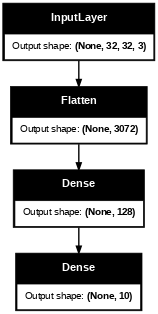

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
# definimos algunos hiperparámetros
batch_size = 128
epochs = 20
validation_split = 0.2

In [ ]:
#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.SGD(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1)

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# Graficamos la matriz de confusión
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
# Comparamos otras métricas de clasificación como la precisión, recall y f1-score
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

Podemos observar como este simple modelo de redes neuronales no es lo suficientemente capaz de clasificar las imágenes, de hecho les asigna el mismo label a todas las imágenes.

Es por esto que saltan los warnings, porque al calcular f1, recall y precisión, no hay datos para las otras clases.

Ahora vamos a ver como podemos mejorar nuestro modelo.

### 1.2.2 Mejorando el Modelo

In [ ]:
#Es una práctica común en modelos de machine learning escalar nuestros datos, asi nos aseguramos de que todos tengan el mismo rango, con pequeños cambios como estos nuestros modelos pueden mejorar su desempeño.

#Escalamos las imágenes entre [0,1]
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Agregamos capas de Dropout, inicializadores y hacemos el modelo más profundo
inputs = keras.Input(shape=input_shape)
x = keras.layers.Flatten()(inputs)
x =  keras.layers.Dense(512, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal")(x)
x = keras.layers.Dropout(0.1)(x)
x =  keras.layers.Dense(32, activation='relu', kernel_initializer="he_normal")(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()



**Explique cómo funciona la capa de Dropout dentro del modelo y por qué esta capa mejora las predicciones [3pts]**

Respuesta: En la fase de entrenamiento se selecciona aleatoriamente una cierta parte (porcentaje) de neuronas de la capa anterior a ella, con lo cual sus salidas se hacen temporalmente nulas. Simula la eliminación temporal de una parte de la red neuronal durante el proceso de entrenamiento. Luego, en la fase de inferencia o predicción, todas las neuronas están activas.

Mejora las predicciones porque evita el overfitting, mejora la generalización de la red (robustez) y la regularización (evita que la red se vuelva demasiado sensible a pequeñas variaciones en los datos).

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Agregamos Callbacks
#Early Stopping monitorea la función de pérdida y detiene el entrenamiento cuando no hay mejora dentro de un número de épocas determinado, lo que nos ahorra tiempo de entrenamiento y también evita el sobreajuste.
my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
]

In [ ]:
#Cambiamos el Optimizador a Adam
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.Adam(learning_rate=1e-3) # 0.0001
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
# agregamos más epochs ahora que tenemos early stopping
batch_size = 128
epochs = 200
validation_split = 0.2

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Aún estamos con un accuracy del 0.5, eso seria equivalente a lanzar una moneda al aire y que salga cara o sello, por lo que no es un buen modelo, pero se puede mejorar.

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

### 1.2.3 Último Modelo ahora Con Convoluciones y Skip Connections

Keras nos permite complejizar el modelo de una manera muy sencilla, agregaremos capas convolucionales, ya que estas son muy buenas a la hora de trabajar con imágenes, también agregaremos skip connections que son conexiones que se saltan capas del modelo.

**EJEMPLO DE SKIP CONNECTION**

<img src="https://theaisummer.com/static/8d19d048cd68d6dce362e025cf3b635a/1ac66/skip-connection.png">

**¿Qué problema resuelven las Skip Connections y como lo hacen? [3pts]**

Respuesta: Las skip connections consisten en una conexión directa entre dos neuronas de tal manera que se salten una o más capas entre ambas, esto implica que el input de la segunda de estas no sea el output de la neurona anterior, si no que, de alguna manera, se pasa directamente la información de la primera de ellas.

Estas pueden evitar que el gradiente explote o tienda a desaparecer durante la fase de entrenamiento, pues se proporcionan caminos más cortos para este. Además, son útiles para evitar pérdida de información relevante a medida que se procesan los datos a través de las múltiples capas, pues se les permite a las más profundas acceder directamente a las características de las más tempranas.





In [ ]:
# Agregamos capas de Dropout, inicializadores y hacemos el modelo más profundo
inputs = keras.Input(shape=input_shape)
x_1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(inputs)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)
x_1 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_1)
x_1 = keras.layers.Dropout(0.2)(x_1)
flatten_x1 = keras.layers.Flatten()(x_1)

x_2 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_1)
x_2 = keras.layers.BatchNormalization()(x_2)
x_2 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_2)
x_2 = keras.layers.BatchNormalization()(x_2)
x_2 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_2)
x_2 = keras.layers.Dropout(0.2)(x_2)
flatten_x2 = keras.layers.Flatten()(x_2)

x_3 = keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_2)
x_3 = keras.layers.BatchNormalization()(x_3)
x_3 = keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer="he_normal")(x_3)
x_3 = keras.layers.BatchNormalization()(x_3)
x_3 = keras.layers.MaxPooling2D(pool_size=(2,2))(x_3)
x_3 = keras.layers.Dropout(0.2)(x_3)
flatten_x3 = keras.layers.Flatten()(x_3)

z = keras.layers.concatenate([flatten_x1, flatten_x2])
z = keras.layers.concatenate([z, flatten_x3])

z =  keras.layers.Dense(512, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(256, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal")(z)
z = keras.layers.Dropout(0.1)(z)
z =  keras.layers.Dense(32, activation='relu', kernel_initializer="he_normal")(z)
outputs = keras.layers.Dense(num_classes, activation='softmax')(z)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Cambiamos el Optimizador a AdamW
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.AdamW(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics, jit_compile=True)

In [ ]:
#Early Stopping
my_callbacks = [
    keras.callbacks.EarlyStopping(
      monitor="val_loss",
      min_delta=0,
      patience=10,
      restore_best_weights=True #Es importante retornar los mejores pesos, por defecto viene en False asi que siempre asegurarse de ponerlo en True
    )
]

In [ ]:
# Hiperparámetros
batch_size = 128
epochs = 200
validation_split = 0.2

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

Ahora ya tenemos resultados aceptables, pero esta no es la única forma de mejorar nuestro modelo, si ya conocemos alguna arquitectura del estado del arte para nuestra tarea podemos simplemente importar un modelo, congelarlo y reemplazar la última capa para que se ajuste a nuestro problema. Esto se llama `Transfer Learning` y es una de las formas más usadas para entrenar redes neuronales en la actualidad, ya que nos ahorra mucho tiempo de entrenamiento y nos permite usar modelos que ya han sido probados y que sabemos que funcionan bien.

### 1.2.4 Transfer Learning

In [ ]:
pre_trained_mobilenet = keras.applications.VGG16(input_shape=input_shape,include_top=False) #Cargamos la red pre-entrenada, sin la capa densa final, ya que queremos adaptar esta red a nuestro dataset.

#Agregamos una capa de GlobalAveragePooling2D para reducir la dimensionalidad de la salida de la red pre-entrenada y la capa de salida.
x = pre_trained_mobilenet.output
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=pre_trained_mobilenet.input, outputs=outputs)

for layer in pre_trained_mobilenet.layers: #Tenemos que explicitar que no queremos entrenar las capas de la red pre-entrenada.
    layer.trainable = False

model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="TB", dpi=50)

In [ ]:
#Cambiamos el Optimizador
loss= keras.losses.CategoricalCrossentropy()
optimizer= keras.optimizers.AdamW(learning_rate=1e-3)
metrics=["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
#Entrenamos nuestro modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=validation_split,
                    verbose=1,
                    callbacks=my_callbacks
                    )

In [ ]:
plot_losses(history, loss)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
y_pred = model.predict(x_test)

plot_cm(y_pred, y_test)

In [ ]:
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names))

Podemos observar cómo no obtenemos resultados tan buenos como la red anterior pero hay que tener en cuenta que implementamos una arquitectura en menos de 5 lineas, desde cargar el modelo, agregar una capa de max pooling y finalmente la capa de salida.

## Parte 2: Datset Guiado

### 2.1 Exploracion de la Data

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import pandas as pd
filepath = '/content/drive/MyDrive/Colab Notebooks/Steel_industry_data.csv'
df = pd.read_csv(filepath)

# Renombrar columnas

newcols = ["date",
           "kWh",
           "LaggCRP",
           "LeadCRP",
           "CO2",
           "LaggCPF",
           "LeadCPF",
           "NSM",
           "Week",
           "Day",
           "Load"]

df.columns = newcols

# create a copy
df_new = df.copy()
df_new

date   kWh  LaggCRP  LeadCRP  CO2  LaggCPF  LeadCPF    NSM  \
0      01/01/2018 00:15  3.17     2.95     0.00  0.0    73.21   100.00    900   
1      01/01/2018 00:30  4.00     4.46     0.00  0.0    66.77   100.00   1800   
2      01/01/2018 00:45  3.24     3.28     0.00  0.0    70.28   100.00   2700   
3      01/01/2018 01:00  3.31     3.56     0.00  0.0    68.09   100.00   3600   
4      01/01/2018 01:15  3.82     4.50     0.00  0.0    64.72   100.00   4500   
...                 ...   ...      ...      ...  ...      ...      ...    ...   
35035  31/12/2018 23:00  3.85     4.86     0.00  0.0    62.10   100.00  82800   
35036  31/12/2018 23:15  3.74     3.74     0.00  0.0    70.71   100.00  83700   
35037  31/12/2018 23:30  3.78     3.17     0.07  0.0    76.62    99.98  84600   
35038  31/12/2018 23:45  3.78     3.06     0.11  0.0    77.72    99.96  85500   
35039  31/12/2018 00:00  3.67     3.02     0.07  0.0    77.22    99.98      0   

          Week     Day        Load  
0      Weekday  Monday  Light_Load  
1      Weekday  Monday  Light_Load  
2      Weekday  Monday  Light_Load  
3      Weekday  Monday  Light_Load  
4      Weekday  Monday  Light_Load  
...        ...     ...         ...  
35035  Weekday  Monday  Light_Load  
35036  Weekday  Monday  Light_Load  
35037  Weekday  Monday  Light_Load  
35038  Weekday  Monday  Light_Load  
35039  Weekday  Monday  Light_Load  

[35040 rows x 11 columns]

Siempre es bueno revisar los datos que tenemos, ver si existen datos faltantes, el tipo de dato de cada columna, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

**Realice un pequeño EDA (Exploratory Data Analisys) del Dataset, mostrando algunos gráficos como el que se presenta a continuación, y comente lo que observa. [3pts]**

### EDA

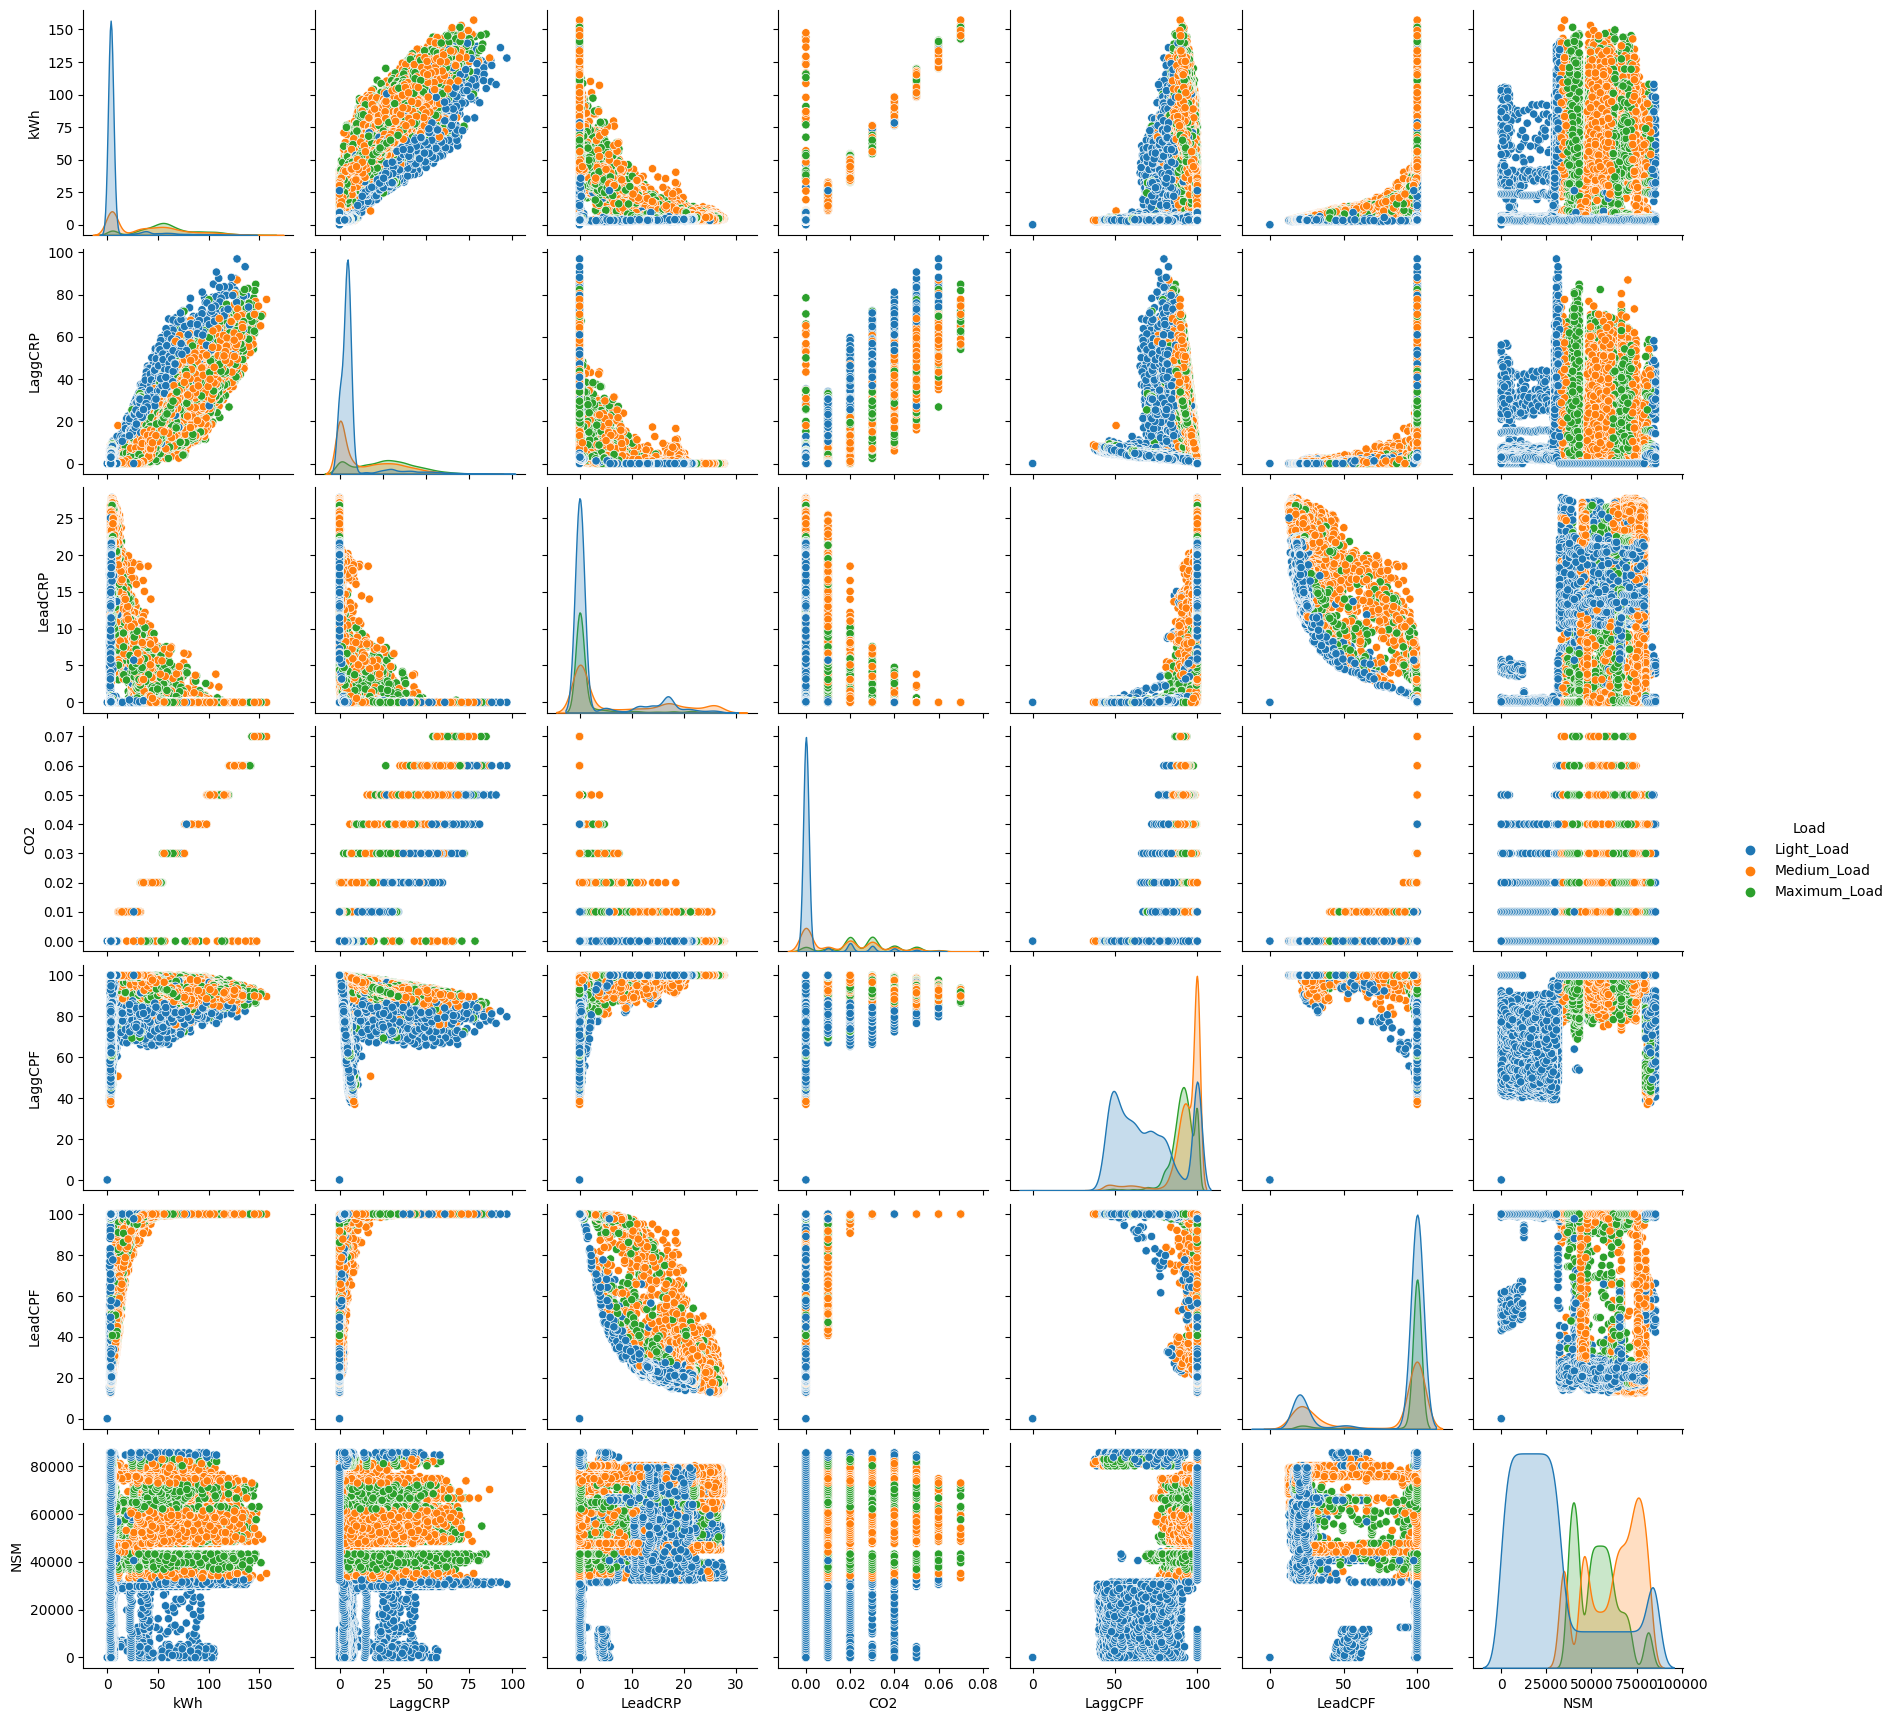

In [ ]:
# sns.pairplot(df, hue='Load_Type')
sns.pairplot(df, hue='Load')

In [ ]:
df["Load"].value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load, dtype: int64

In [ ]:
df["Week"].value_counts()

Weekday    25056
Weekend     9984
Name: Week, dtype: int64

In [ ]:
df["Day"].value_counts()

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day, dtype: int64

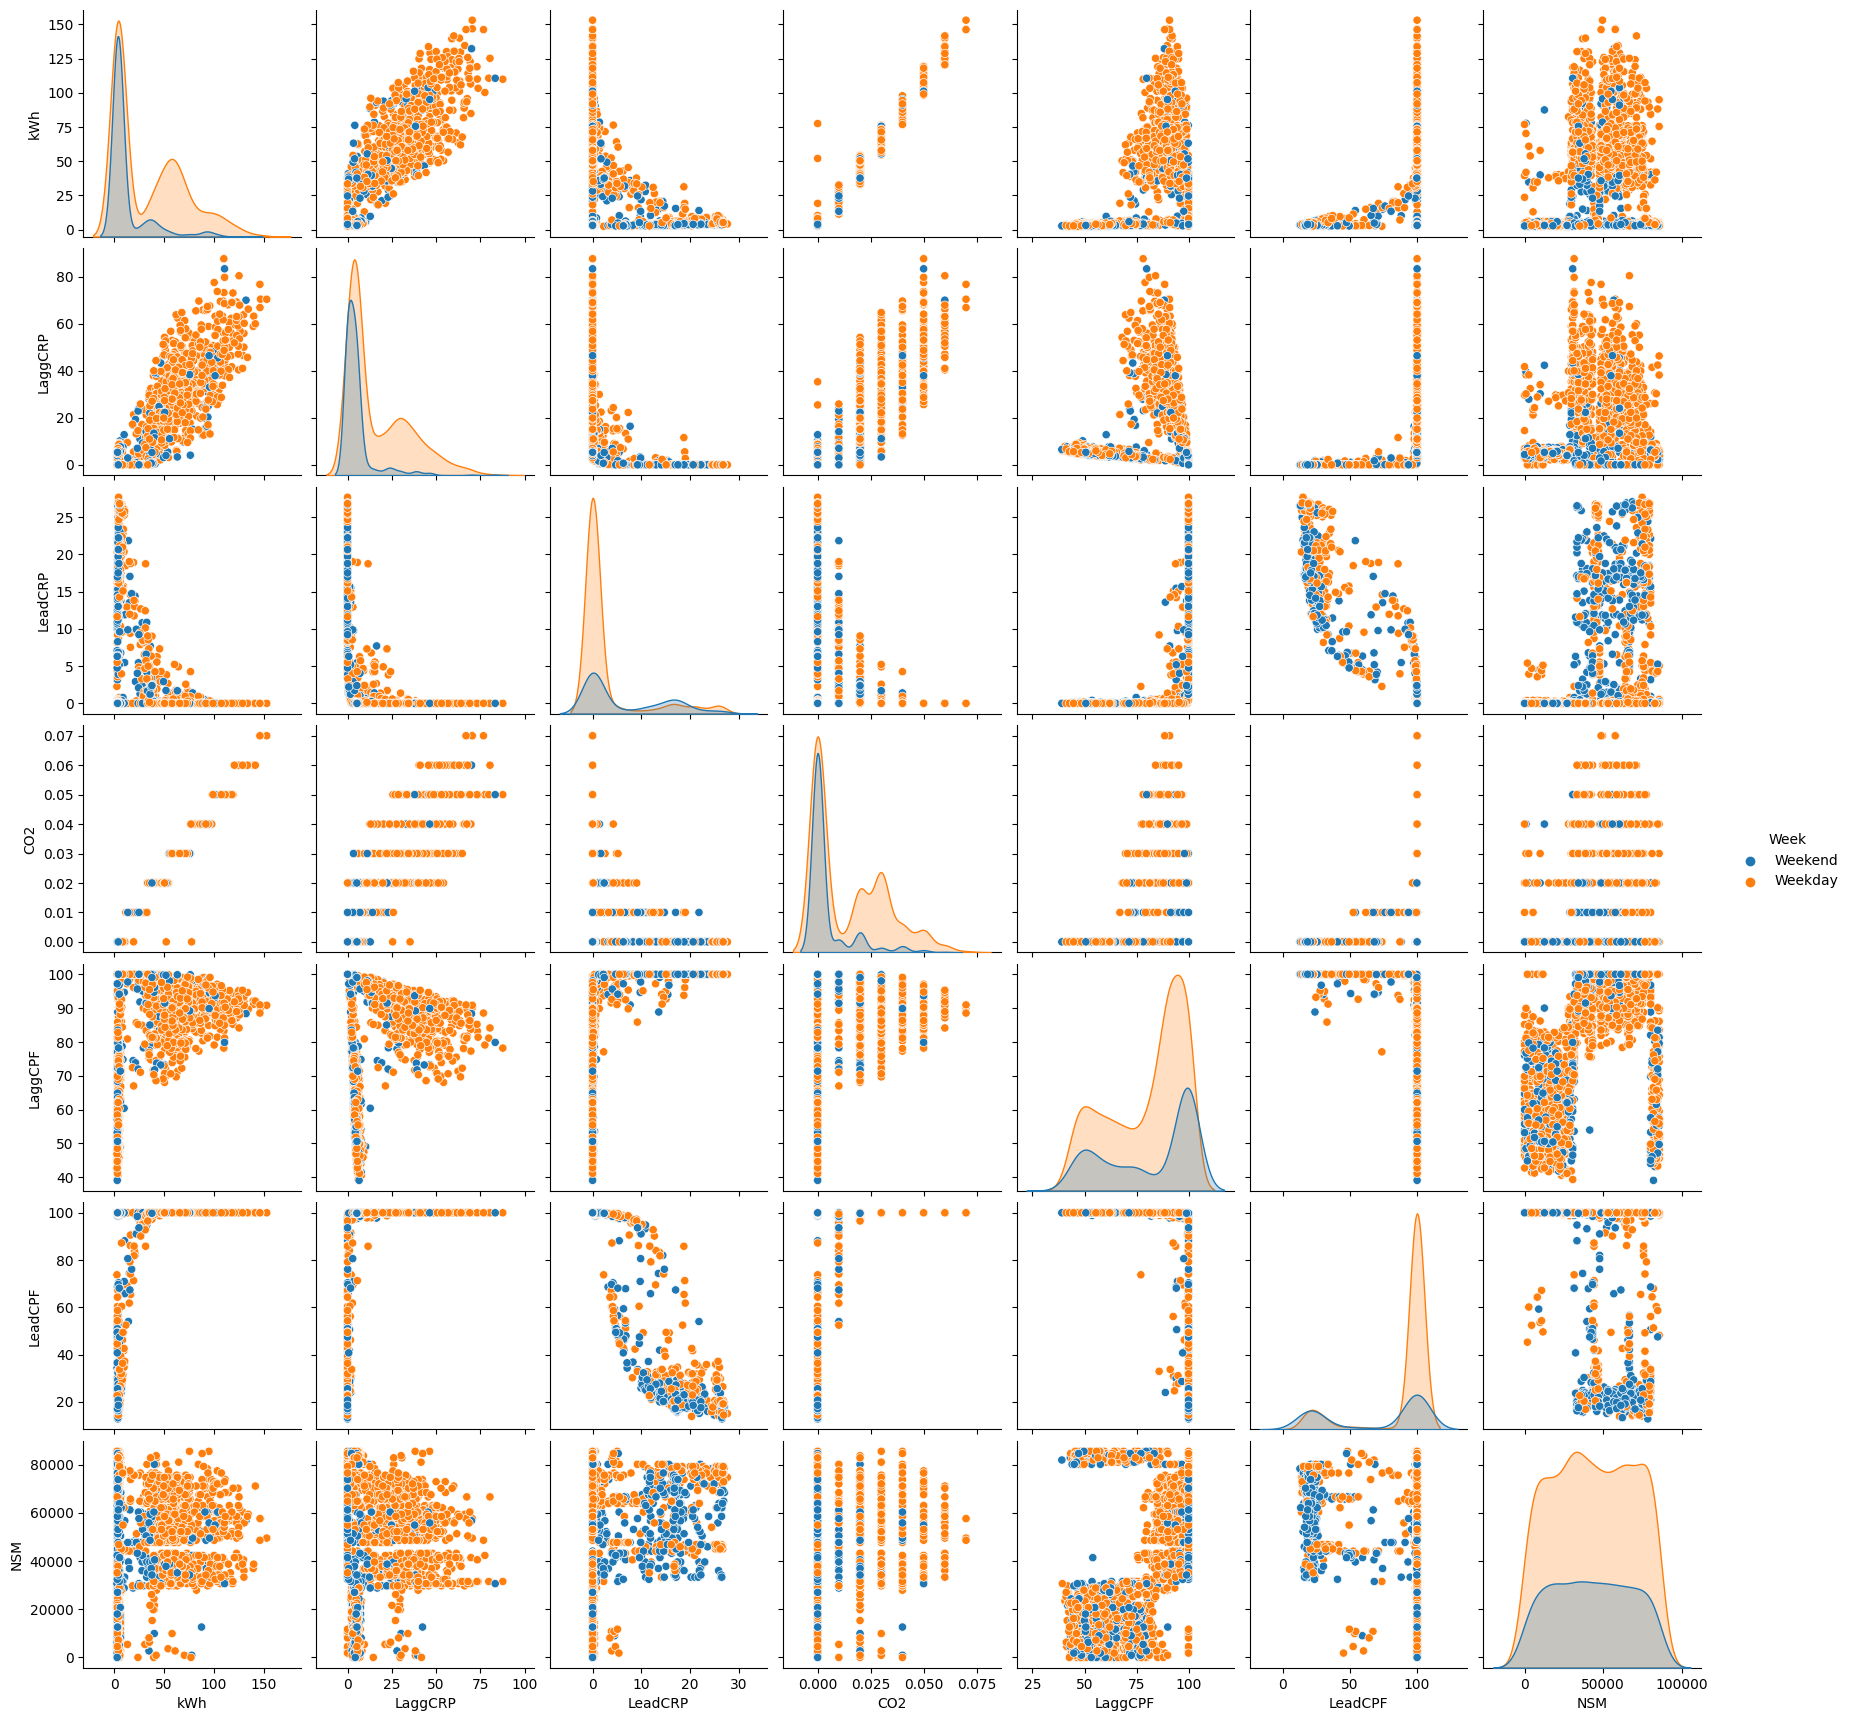

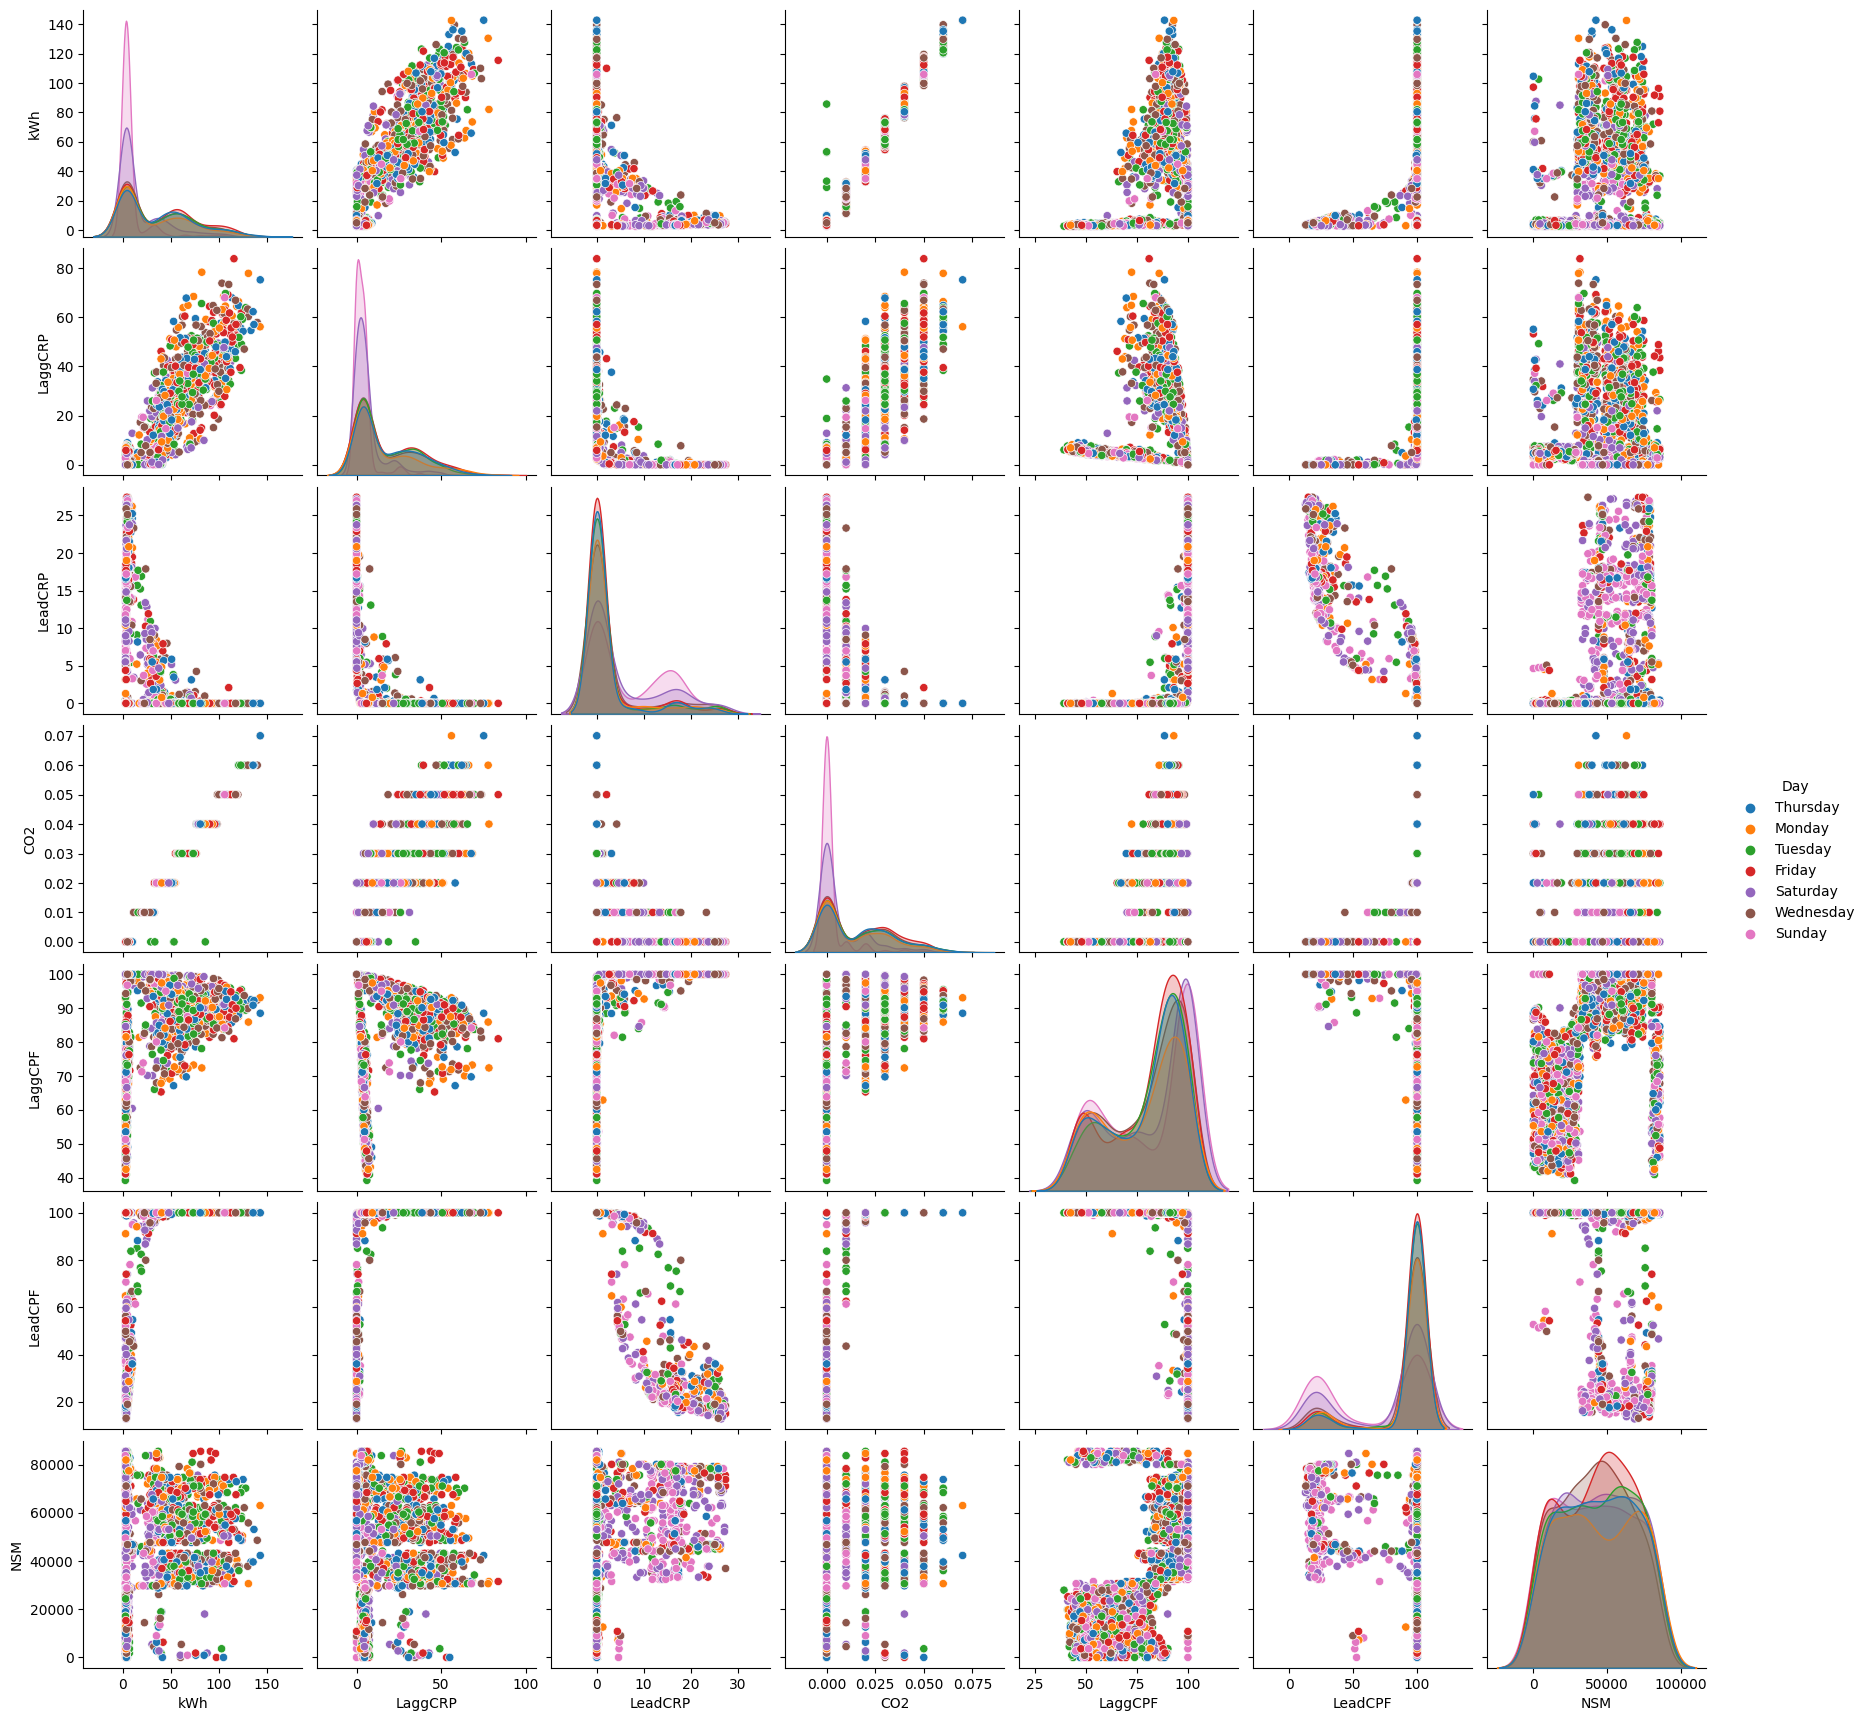

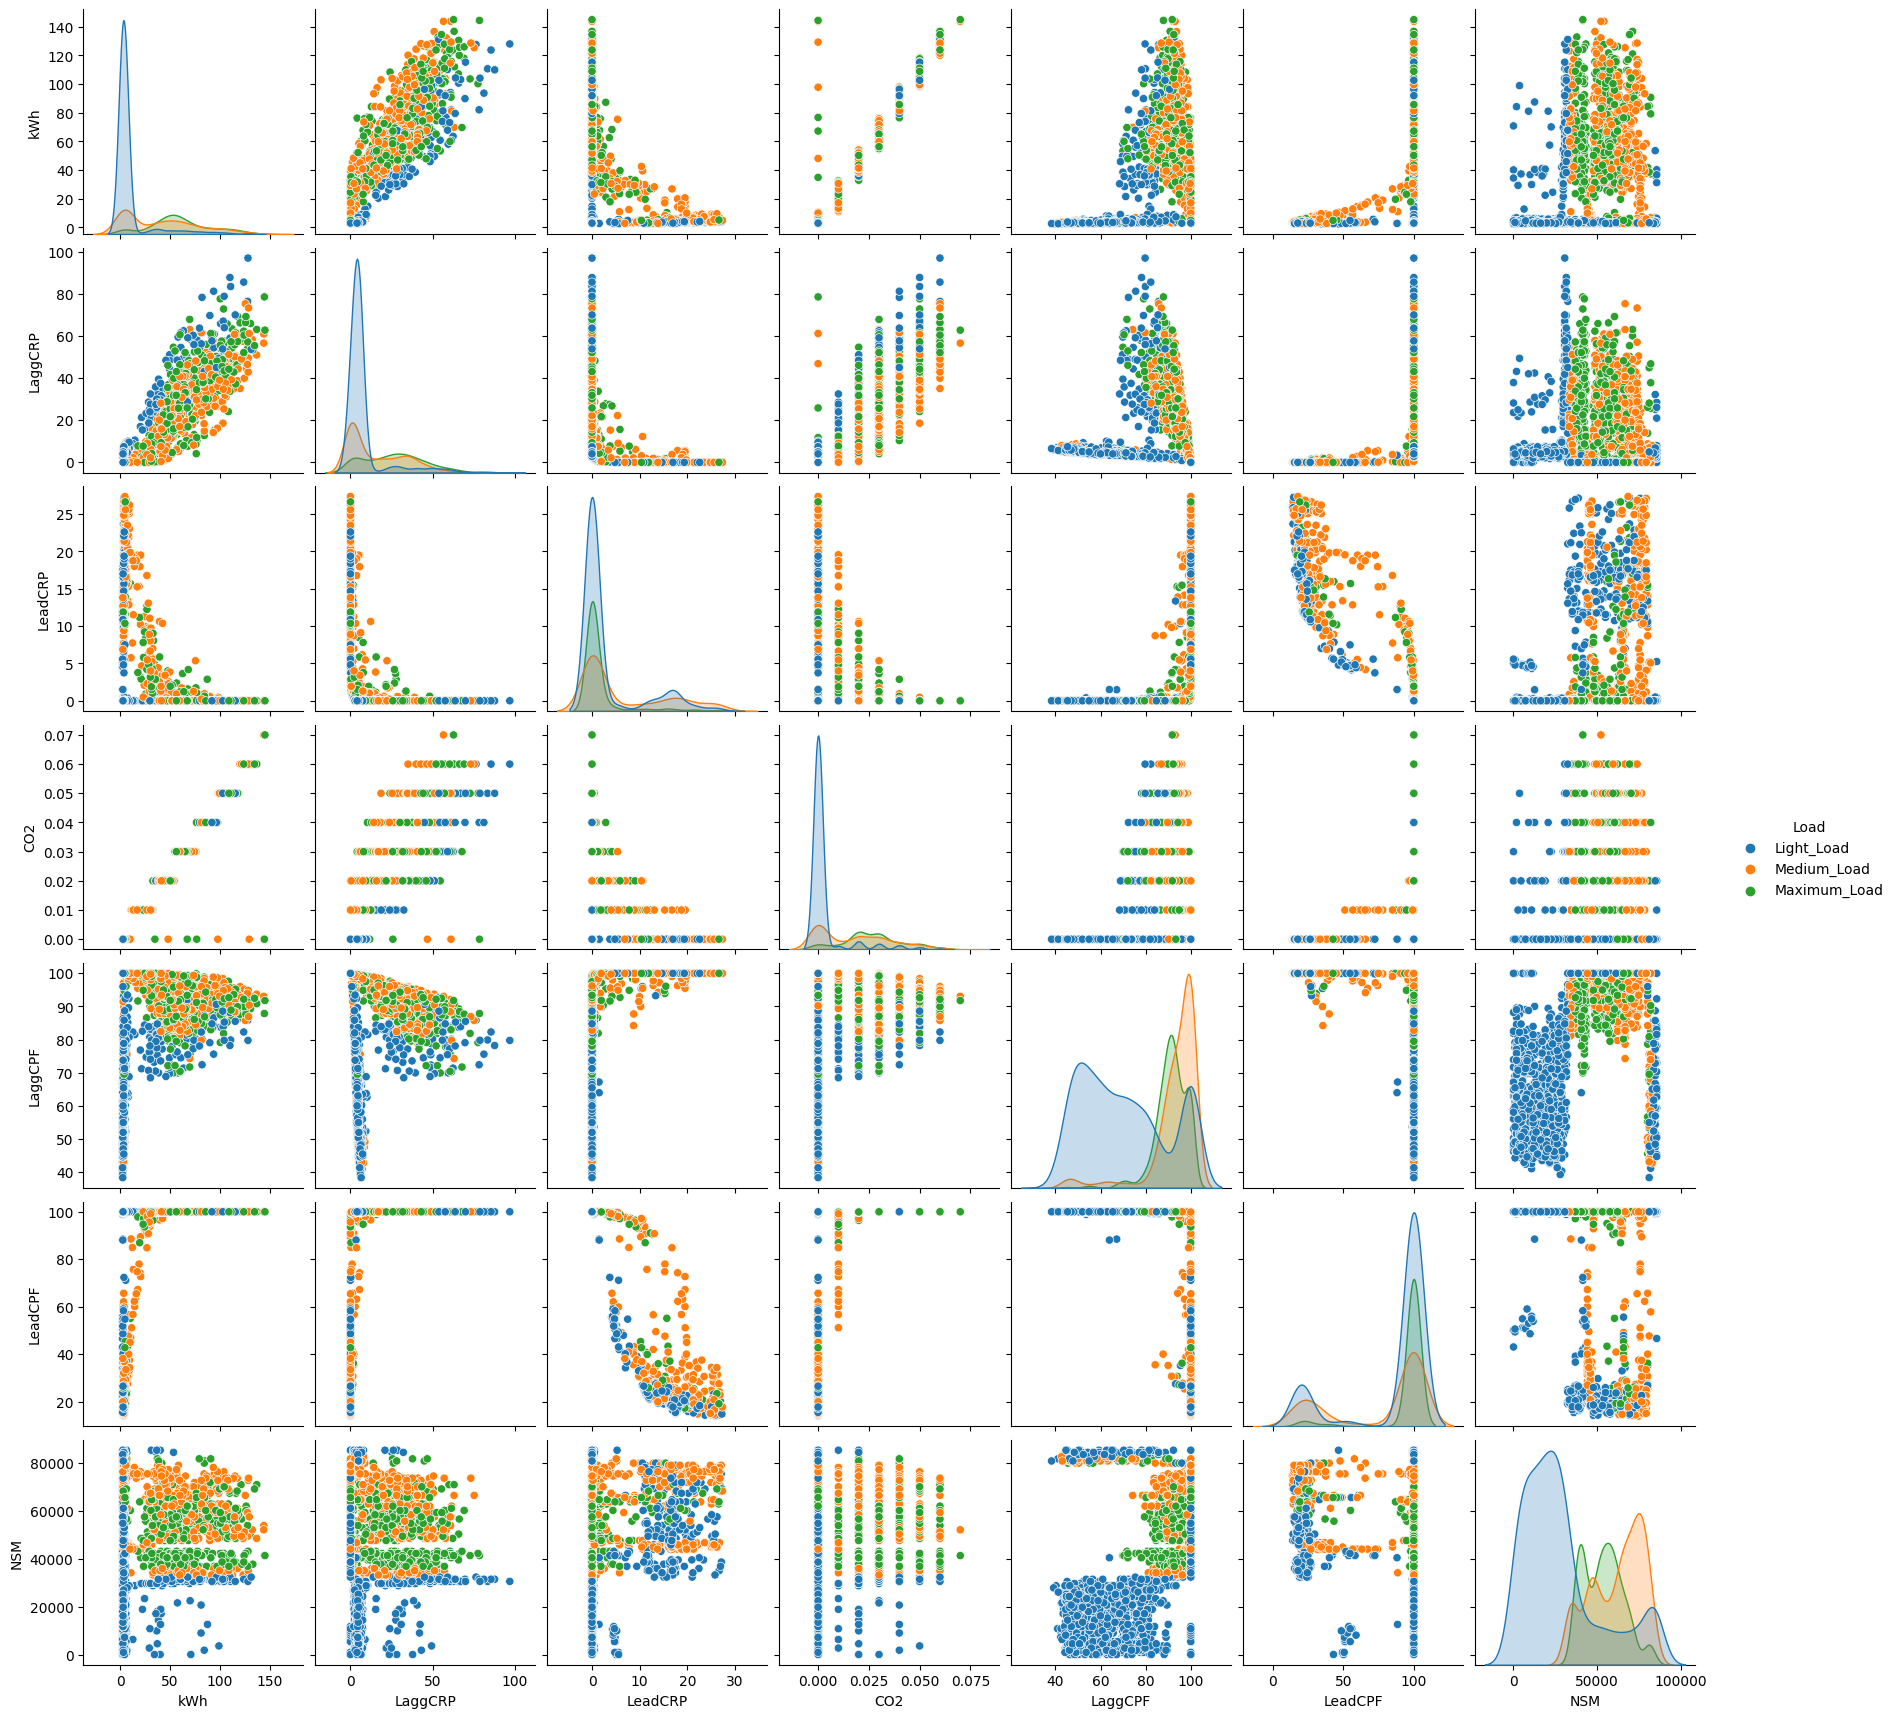

In [ ]:
#Gráficos del EDA

# use sample for speeding up
# hue: which column in the data frame should be used for colour encoding

# grouped by Week
sns.pairplot(df.sample(2500), hue='Week')

# grouped by Day
sns.pairplot(df.sample(2500), hue='Day')

# grouped by Load type
sns.pairplot(df.sample(2500), hue='Load')

### 2.2 Preprocesamiento

El proceso típico de entrenamiento de un modelo consta de dividir la data en 3 conjuntos, uno para entrenamiento, otro para validación y otro para testing

**Defina cuál es la utilidad de cada uno de estos conjuntos e implemente el código para separar la data considerando un split de 80/10/10 respectivamente** [3 Pts]

**Respuesta**

*80% de la data para entrenamiento, 10% para validación y el 10% para testing*

*Para ello se puede apoyar en la función [train_test_split](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) de scikit-learn.*

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size="size_for_test", random_state=SEED)
```
```
# Using a pandas dataframe
df_train, df_test = train_test_split(df_data, test_size="size_for_test", random_state=SEED)
```



*   `Training`: Se utiliza para entrenar el modelo. Se ajustan los parámetros para minimizar la función de pérdida en este conjunto. La idea es que sea variado para evitar el overfitting.
*   `Validation`: Se utiliza para para ajustar los hiperparámetros del modelo. Estos son valores importantes que cambian el rendimiento de la red.
*   `Testing`: Se utiliza para validar el entrenamiento Y  evaluar el rendimiento final del modelo. Es completamente independiente de los conjuntos de entrenamiento y validación.



### 2.3 Feature Engineering

Feature Engineering se considera un arte porque involucra mucho la creatividad con el conocimiento del dominio del problema. Consiste en el proceso de crear nuevas características o features a partir de otras existentes. En general la idea principal es la de utilizar el conocimiento del contexto del problema o bien del dominio de los datos para aprovechar esa información y crear features que puedan ayudar en el desempeño de un algoritmo, si bien existen técnicas más o menos estándar como lo puede ser normalizar o estandarizar valores numéricos tambien existen otras transformaciones que no son tan simples y varían mucho dependiendo del problema.

[Referencia](https://elitedatascience.com/feature-engineering)

#### Standard Techniques

Como se ha mencionado anteriormente existen técnicas bastante conocidas en la actualidad para abordar el apartado de Feature Engineer donde la mayoría de estas se pueden dividir en dos grandes grupos dependiendo del tipo de datos tengamos:

1.   Variables numéricas
2.   Variables categóricas

#### Numerical values

*   Normalizing: `MinMaxScaler `
*   Standarizing: `StandardScaler`

#### Categorical values

*   `One-Hot Encoding.`
*   `Ordinal Encoding.`
*   `Label Encoding.`





**Observe el siguiente código y comente cuál podría ser su utilidad para una variable relacionada con fechas, como lo puede ser un día** [2 Pts]

**Respuesta:** Se utiliza para enseñarle a la red el carácter cíclico de los días del año. Esto a fin de evitar que aprenda patrones que no se condicen con la realidad (o evitar que asuma la existencia de una relación de orden entre los días, cuando en realidad no la hay). Además, se evita la representación one-hot, común para este tipo de problemas pero en el pasado.

In [5]:
def preprocess_time(df, column, period):
    df['sin_'+column] = np.sin(2 * np.pi * df[column] / period)
    df['cos_'+column] = np.cos(2 * np.pi * df[column] / period)
    df.drop([column], axis=1, inplace=True)
    return df

In [6]:
# Crear un dataframe de muestra y aplicar la función
df_day = pd.DataFrame(data=np.arange(1, 366), columns=["day"])
df_day = preprocess_time(df_day, "day", 365)
df_day

sin_day   cos_day
0    1.721336e-02  0.999852
1    3.442161e-02  0.999407
2    5.161967e-02  0.998667
3    6.880243e-02  0.997630
4    8.596480e-02  0.996298
..            ...       ...
360 -6.880243e-02  0.997630
361 -5.161967e-02  0.998667
362 -3.442161e-02  0.999407
363 -1.721336e-02  0.999852
364  6.432491e-16  1.000000

[365 rows x 2 columns]

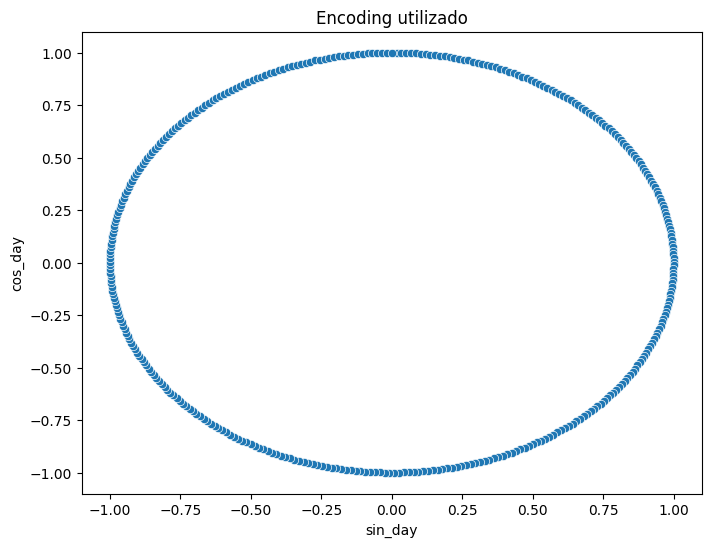

In [ ]:
# Mostrar la transformación aplicada
fig = plt.figure(figsize=(8, 6))

sns.scatterplot(data=df_day, x="sin_day", y="cos_day").set_title("Encoding utilizado")

plt.show()

**Defina o explique la transformación que aplica cada uno de los siguientes encoding e indique la diferencia entre ellos considerando sklearn** [3 Pts]


**Respuesta**



*   `One-Hot Encoding`: One-hot encoding es una técnica en la que cada categoría única se convierte en un vector binario, donde una posición está marcada como "1" y las demás como "0". Esto se hace para representar las categorías de manera numérica sin asumir ninguna relación de orden o significado intrínseco entre las categorías. En scikit-learn, se puede usar la clase OneHotEncoder para realizar esta transformación. Cada categoría se convierte en una columna independiente en la matriz resultante.
*   `Ordinal Encoding`: El ordinal encoding asigna un valor numérico a cada categoría única basado en su posición en una secuencia predefinida. A diferencia del one-hot encoding, aquí se asume un orden inherente entre las categorías. Esto es útil cuando las categorías tienen un significado ordinal, como niveles o tamaños. En scikit-learn se puede usar la clase OrdinalEncoder para realizar esta transformación.
*   `Label Encoding`: Label encoding asigna un número único a cada categoría, similar al ordinal encoding. Sin embargo, en el label encoding no necesariamente hay una secuencia ordinal predefinida; las asignaciones se realizan de manera arbitraria. Esto puede llevar a que los algoritmos interpreten una relación de orden errónea entre las categorías. En scikit-learn, no hay una clase específica para el label encoding.

**Aplique las siguientes técnicas de preprocesamiento para cada feature especificado:** [3 Pts]

*   `MinMaxScaler` con rango (0, 1): `CO2(tCO2)`, `NSM`
*   `StandardScaler`: `Lagging_Current_Reactive.Power_kVarh`, `Leading_Current_Reactive_Power_kVarh`, `Lagging_Current_Power_Factor`, `Leading_Current_Power_Factor`
*   `Ordinal Encoding`: `Load_Type`
*   `One-Hot Encoding`: `WeekStatus`
*   `Label Encoding`: `Day_of_week`

Por último separe en `dia`, `mes` y `hora` la columna `date` y aplique la transformación cíclica a las nuevas columnas (con el periodo correspondiente para cada una).

In [7]:
# Run once

df_new['date'] = pd.to_datetime(df_new['date'], format='%d/%m/%Y %H:%M')

# Extract day, month, and hour components
df_new['day'] = df_new['date'].dt.day
df_new['month'] = df_new['date'].dt.month
df_new['hour'] = df_new['date'].dt.hour

preprocess_time(df_new, "day", 30)
preprocess_time(df_new, "month", 12)
preprocess_time(df_new, "hour", 24)

df_new

date   kWh  LaggCRP  LeadCRP  CO2  LaggCPF  LeadCPF  \
0     2018-01-01 00:15:00  3.17     2.95     0.00  0.0    73.21   100.00   
1     2018-01-01 00:30:00  4.00     4.46     0.00  0.0    66.77   100.00   
2     2018-01-01 00:45:00  3.24     3.28     0.00  0.0    70.28   100.00   
3     2018-01-01 01:00:00  3.31     3.56     0.00  0.0    68.09   100.00   
4     2018-01-01 01:15:00  3.82     4.50     0.00  0.0    64.72   100.00   
...                   ...   ...      ...      ...  ...      ...      ...   
35035 2018-12-31 23:00:00  3.85     4.86     0.00  0.0    62.10   100.00   
35036 2018-12-31 23:15:00  3.74     3.74     0.00  0.0    70.71   100.00   
35037 2018-12-31 23:30:00  3.78     3.17     0.07  0.0    76.62    99.98   
35038 2018-12-31 23:45:00  3.78     3.06     0.11  0.0    77.72    99.96   
35039 2018-12-31 00:00:00  3.67     3.02     0.07  0.0    77.22    99.98   

         NSM     Week     Day        Load   sin_day   cos_day     sin_month  \
0        900  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
1       1800  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
2       2700  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
3       3600  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
4       4500  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
...      ...      ...     ...         ...       ...       ...           ...   
35035  82800  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35036  83700  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35037  84600  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35038  85500  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35039      0  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   

       cos_month  sin_hour  cos_hour  
0       0.866025  0.000000  1.000000  
1       0.866025  0.000000  1.000000  
2       0.866025  0.000000  1.000000  
3       0.866025  0.258819  0.965926  
4       0.866025  0.258819  0.965926  
...          ...       ...       ...  
35035   1.000000 -0.258819  0.965926  
35036   1.000000 -0.258819  0.965926  
35037   1.000000 -0.258819  0.965926  
35038   1.000000 -0.258819  0.965926  
35039   1.000000  0.000000  1.000000  

[35040 rows x 17 columns]

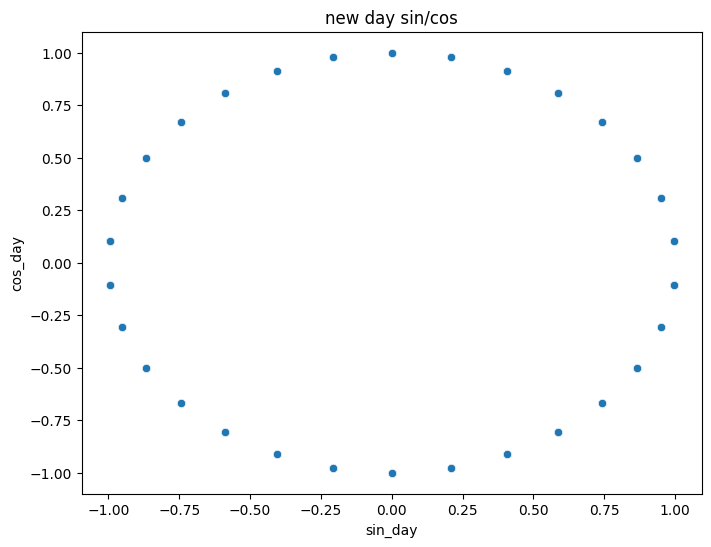

In [ ]:
# Mostrar la transformación aplicada
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_newday, x="sin_day", y="cos_day").set_title("new day sin/cos")
plt.show()

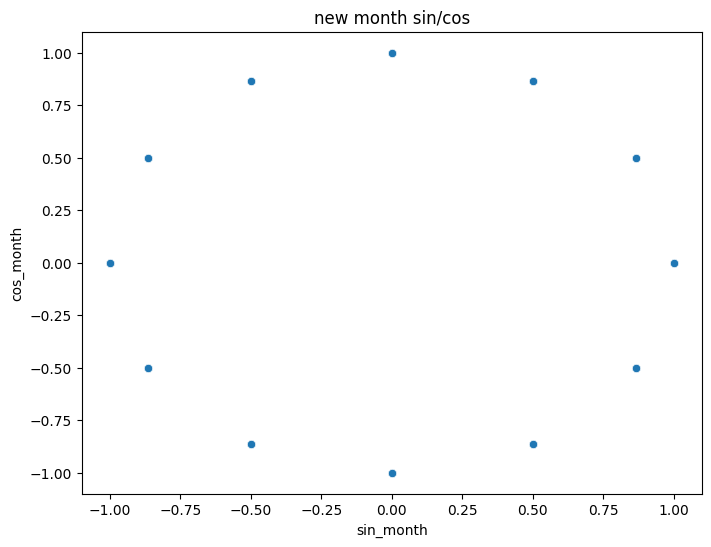

In [ ]:
# Mostrar la transformación aplicada
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_newday, x="sin_month", y="cos_month").set_title("new month sin/cos")
plt.show()

### 2.4 Datos a predecir

Una vez teniendo nuestro dataset preprocesado toca crear un modelo de redes neuronales para predecir, para esto vamos a separar nuestro vector de entrada de la columna a predecir

In [ ]:
df_new

date   kWh  LaggCRP  LeadCRP  CO2  LaggCPF  LeadCPF  \
0     2018-01-01 00:15:00  3.17     2.95     0.00  0.0    73.21   100.00   
1     2018-01-01 00:30:00  4.00     4.46     0.00  0.0    66.77   100.00   
2     2018-01-01 00:45:00  3.24     3.28     0.00  0.0    70.28   100.00   
3     2018-01-01 01:00:00  3.31     3.56     0.00  0.0    68.09   100.00   
4     2018-01-01 01:15:00  3.82     4.50     0.00  0.0    64.72   100.00   
...                   ...   ...      ...      ...  ...      ...      ...   
35035 2018-12-31 23:00:00  3.85     4.86     0.00  0.0    62.10   100.00   
35036 2018-12-31 23:15:00  3.74     3.74     0.00  0.0    70.71   100.00   
35037 2018-12-31 23:30:00  3.78     3.17     0.07  0.0    76.62    99.98   
35038 2018-12-31 23:45:00  3.78     3.06     0.11  0.0    77.72    99.96   
35039 2018-12-31 00:00:00  3.67     3.02     0.07  0.0    77.22    99.98   

         NSM     Week     Day        Load   sin_day   cos_day     sin_month  \
0        900  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
1       1800  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
2       2700  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
3       3600  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
4       4500  Weekday  Monday  Light_Load  0.207912  0.978148  5.000000e-01   
...      ...      ...     ...         ...       ...       ...           ...   
35035  82800  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35036  83700  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35037  84600  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35038  85500  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   
35039      0  Weekday  Monday  Light_Load  0.207912  0.978148 -2.449294e-16   

       cos_month  sin_hour  cos_hour  
0       0.866025  0.000000  1.000000  
1       0.866025  0.000000  1.000000  
2       0.866025  0.000000  1.000000  
3       0.866025  0.258819  0.965926  
4       0.866025  0.258819  0.965926  
...          ...       ...       ...  
35035   1.000000 -0.258819  0.965926  
35036   1.000000 -0.258819  0.965926  
35037   1.000000 -0.258819  0.965926  
35038   1.000000 -0.258819  0.965926  
35039   1.000000  0.000000  1.000000  

[35040 rows x 17 columns]

Ahora hay que separar el dataset en conjuntos de *training*, *validation* y *test*, para así normalizar y estandarizar cada uno por separado. Previamente a esto, se realiza encoding al dataset en general.

In [8]:
# Separar la columna a predecir "Usage_kWh" y los datos para entrenar
from sklearn.model_selection import train_test_split

del df_new['date']

df_features = df_new.drop(["kWh"], axis = 1)
df_kWh = df_new["kWh"] # kWh isolated

X_train, X_test, y_train, y_test = train_test_split(df_features, df_kWh, test_size=0.25)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, train_size = 0.5 )

In [9]:
# StandardScaler: Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh, Lagging_Current_Power_Factor, Leading_Current_Power_Factor
from sklearn.preprocessing import StandardScaler
# MinMaxScaler con rango (0, 1): CO2(tCO2), NSM
from sklearn.preprocessing import MinMaxScaler
# One-Hot Encoding: WeekStatus
from sklearn.preprocessing import OneHotEncoder
# Ordinal Encoding: Load_Type
from sklearn.preprocessing import OrdinalEncoder
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [10]:
# Initialize a single StandardScaler object
scaler = StandardScaler()

columns_to_scale = ['LaggCRP', 'LeadCRP', 'LaggCPF', 'LeadCPF']

# Fit and transform the training data using a single scaler
scaled_data_training = scaler.fit_transform(X_train[columns_to_scale])

# Transform the validation and test data using the same scaler
scaled_data_validation = scaler.transform(X_validation[columns_to_scale])
scaled_data_test = scaler.transform(X_test[columns_to_scale])

# Assign the scaled data back to their respective dataframes
X_train[columns_to_scale] = scaled_data_training
X_validation[columns_to_scale] = scaled_data_validation
X_test[columns_to_scale] = scaled_data_test

In [11]:
# Initialize a single MinMaxScaler object
scaler = MinMaxScaler()

columns_to_scale = ['CO2', 'NSM']

# Fit and transform the training data using a single scaler
scaled_data_training = scaler.fit_transform(X_train[columns_to_scale])

# Transform the validation and test data using the same scaler
scaled_data_validation = scaler.transform(X_validation[columns_to_scale])
scaled_data_test = scaler.transform(X_test[columns_to_scale])

# Assign the scaled data back to their respective dataframes
X_train[columns_to_scale] = scaled_data_training
X_validation[columns_to_scale] = scaled_data_validation
X_test[columns_to_scale] = scaled_data_test

In [12]:
# Initialize a single OneHotEncoder object
encoder = OneHotEncoder(sparse=False, drop='first')

# Specify the column you want to one-hot encode
column_to_encode = ['Week']

# Fit and transform the training data using a single encoder
encoded_data_training = encoder.fit_transform(X_train[column_to_encode])

# Transform the validation and test data using the same encoder
encoded_data_validation = encoder.transform(X_validation[column_to_encode])
encoded_data_test = encoder.transform(X_test[column_to_encode])

# Create new column names for the encoded features
encoded_column_names = encoder.get_feature_names_out(input_features=column_to_encode)

# Assign the encoded data back to their respective dataframes with the new column names
X_train_encoded = pd.DataFrame(encoded_data_training, columns=encoded_column_names, index=X_train.index)
X_validation_encoded = pd.DataFrame(encoded_data_validation, columns=encoded_column_names, index=X_validation.index)
X_test_encoded = pd.DataFrame(encoded_data_test, columns=encoded_column_names, index=X_test.index)

# Concatenate the encoded dataframes with the original dataframes, dropping the original columns
X_train = pd.concat([X_train.drop(columns=column_to_encode), X_train_encoded], axis=1)
X_validation = pd.concat([X_validation.drop(columns=column_to_encode), X_validation_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=column_to_encode), X_test_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Initialize a single OrdinalEncoder object
encoder = OrdinalEncoder()

# Specify the column you want to encode
column_to_encode = ['Load']

# Fit and transform the training data using a single encoder
encoded_data_training = encoder.fit_transform(X_train[column_to_encode])

# Transform the validation and test data using the same encoder
encoded_data_validation = encoder.transform(X_validation[column_to_encode])
encoded_data_test = encoder.transform(X_test[column_to_encode])

# Create a new column name for the encoded feature
encoded_column_name = 'Load_Encoded'

# Assign the encoded data back to their respective dataframes with the new column name
X_train[encoded_column_name] = encoded_data_training
X_validation[encoded_column_name] = encoded_data_validation
X_test[encoded_column_name] = encoded_data_test

# Drop the original 'Load' column
X_train.drop(columns=column_to_encode, inplace=True)
X_validation.drop(columns=column_to_encode, inplace=True)
X_test.drop(columns=column_to_encode, inplace=True)


In [16]:
# Initialize a single LabelEncoder object
encoder = LabelEncoder()

# Specify the column you want to encode
column_to_encode = 'Day'

# Fit and transform the training data using a single encoder
encoded_data_training = encoder.fit_transform(X_train[column_to_encode])

# Transform the validation and test data using the same encoder
encoded_data_validation = encoder.transform(X_validation[column_to_encode])
encoded_data_test = encoder.transform(X_test[column_to_encode])

# Create a new column name for the encoded feature
encoded_column_name = 'Day_encoded'

# Assign the encoded data back to their respective dataframes with the new column name
X_train[encoded_column_name] = encoded_data_training
X_validation[encoded_column_name] = encoded_data_validation
X_test[encoded_column_name] = encoded_data_test

# Drop the original 'Day' column
X_train.drop(columns=column_to_encode, inplace=True)
X_validation.drop(columns=column_to_encode, inplace=True)
X_test.drop(columns=column_to_encode, inplace=True)

In [17]:
X_train

LaggCRP   LeadCRP       CO2   LaggCPF   LeadCPF       NSM   sin_day  \
26827 -0.798532  1.088334  0.000000  1.025507 -2.060681  0.463158  0.994522   
18334 -0.599422 -0.523339  0.000000 -0.497725  0.514532  1.000000  0.866025   
22881  2.228062 -0.523339  0.285714 -0.596424  0.514532  0.357895 -0.587785   
14499 -0.451318 -0.523339  0.000000 -1.438793  0.514532  0.042105  0.207912   
1642   0.960273 -0.523339  0.285714 -0.086569  0.514532  0.115789 -0.587785   
...         ...       ...       ...       ...       ...       ...       ...   
16850 -0.798532  2.864929  0.000000  1.025507 -2.032843  0.536842 -0.866025   
6265  -0.517688 -0.523339  0.000000 -0.925771  0.514532  0.273684  0.994522   
11284 -0.789928  1.398065  0.142857  1.024979 -0.508610  0.557895 -0.406737   
860   -0.533052 -0.523339  0.000000 -0.389526  0.514532  0.978947  0.951057   
15795 -0.798532  2.165018  0.000000  1.025507 -1.722691  0.547368  0.207912   

        cos_day     sin_month     cos_month      sin_hour      cos_hour  \
26827  0.104528 -8.660254e-01  5.000000e-01  2.588190e-01 -9.659258e-01   
18334 -0.500000 -5.000000e-01 -8.660254e-01 -2.588190e-01  9.659258e-01   
22881  0.809017 -8.660254e-01 -5.000000e-01  8.660254e-01 -5.000000e-01   
14499  0.978148  1.224647e-16 -1.000000e+00  2.588190e-01  9.659258e-01   
1642  -0.809017  5.000000e-01  8.660254e-01  5.000000e-01  8.660254e-01   
...         ...           ...           ...           ...           ...   
16850  0.500000  1.224647e-16 -1.000000e+00  1.224647e-16 -1.000000e+00   
6265   0.104528  1.000000e+00  6.123234e-17  1.000000e+00  6.123234e-17   
11284  0.913545  8.660254e-01 -5.000000e-01 -2.588190e-01 -9.659258e-01   
860   -0.309017  5.000000e-01  8.660254e-01 -2.588190e-01  9.659258e-01   
15795 -0.978148  1.224647e-16 -1.000000e+00 -2.588190e-01 -9.659258e-01   

       Week_Weekend  Load_Encoded  Day_encoded  
26827           1.0           0.0            3  
18334           0.0           0.0            5  
22881           0.0           0.0            1  
14499           0.0           0.0            0  
1642            0.0           0.0            4  
...             ...           ...          ...  
16850           0.0           2.0            1  
6265            0.0           0.0            6  
11284           1.0           1.0            2  
860             0.0           0.0            5  
15795           0.0           2.0            4  

[26280 rows x 15 columns]

In [19]:
# Por orden alfabetico
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
le_name_mapping

{'Friday': 0,
 'Monday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Thursday': 4,
 'Tuesday': 5,
 'Wednesday': 6}

In [20]:
# check nAn values
has_nan = X_train.isna().any().any()  # or df.isnull().any().any()
print("Are there any NaN values in the DataFrame?", has_nan)

Are there any NaN values in the DataFrame? False


In [21]:
# check nAn values
has_nan = X_test.isna().any().any()  # or df.isnull().any().any()
print("Are there any NaN values in the DataFrame?", has_nan)

Are there any NaN values in the DataFrame? False


### 2.5 Mi primera Red Neuronal


Ahora procederemos a crear nuestro modelo con Keras, aca queda a libre elección si quieren utilizar la API secuencial o funcional, y tambien queda a libre elección la arquitectura de la red, pruebe con distintas capas, distinto número de neuronas, distintas funciones de activación, regularizadores, etc.

In [78]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [79]:

'''
# Create a neural network
model = tf.keras.models.Sequential()

# Add a hidden layer with units, with ReLU activation
model.add(tf.keras.layers.Dense(128, input_shape=(15,), activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation="relu"))
model.summary()

#Con lo siguiente:
#loss = rmse
#metrics=[rmse]
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
#329/329 - 1s - loss: 0.9497 - rmse: 0.9487 - 537ms/epoch - 2ms/step
#Test loss: 0.9497383236885071
#Test accuracy: 0.9486849308013916
#sin las dropouts
'''

# Create a neural network
model = tf.keras.models.Sequential()

# Add a hidden layer with units, with ReLU activation
model.add(tf.keras.layers.Dense(256, input_shape=(15,), activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(rate = 0.999))
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.9))
#model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.9))
#model.add(tf.keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
#model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.Dense(1, activation="relu"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 256)               4096      
                                                                 
 dense_65 (Dense)            (None, 128)               32896     
                                                                 
 dense_66 (Dense)            (None, 128)               16512     
                                                                 
 dense_67 (Dense)            (None, 256)               33024     
                                                                 
 dense_68 (Dense)            (None, 1)                 257       
                                                                 
Total params: 86785 (339.00 KB)
Trainable params: 86785 (339.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Siendo un problema de regresión, ¿cuántas neuronas en la capa de salida tiene que tener nuestro modelo? y con que activación? [3pts]**

**Respuesta**

Una por cada label (target) y con función de activación lineal (o ReLu) si no se espera un recorrido negativo.

Ahora vamos a compilar y entrenar nuestro modelo, si quiere ponerse más creativo en esta sección puede implementar callbacks, probar distintos optimizadores, batch_size y epochs.

In [80]:
# definimos algunos hiperparametros
batch_size = 64           # (24528/32)*(1 - val_split) = iterations
epochs = 150               #cantidad de epochs
# validation_split = 0.1    #Porcentaje de data destinada a validación
# config
verbose = 2 # 0: none, 1: light, 2: loud

In [81]:
from keras import backend as K

def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred- y_true)))

#compilamos nuestro modelo, agregando la función de pérdida, el optimizador y las métricas
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

#loss= 'mean_squared_error'
#metrics=['mean_squared_error']

loss = rmse
metrics=[rmse]

#optimizer= keras.optimizers.SGD(learning_rate=0.001)

# Compile model
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

### 2.6 Entrenando el Modelo

In [82]:
# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_validation, y_validation))

Epoch 1/150
411/411 - 3s - loss: 40.2364 - rmse: 40.2407 - val_loss: 35.6815 - val_rmse: 35.6819 - 3s/epoch - 8ms/step
Epoch 2/150
411/411 - 2s - loss: 30.7011 - rmse: 30.6941 - val_loss: 24.9745 - val_rmse: 24.9830 - 2s/epoch - 4ms/step
Epoch 3/150
411/411 - 2s - loss: 18.2422 - rmse: 18.2397 - val_loss: 12.0939 - val_rmse: 12.0968 - 2s/epoch - 4ms/step
Epoch 4/150
411/411 - 1s - loss: 9.4655 - rmse: 9.4637 - val_loss: 8.4118 - val_rmse: 8.4080 - 1s/epoch - 3ms/step
Epoch 5/150
411/411 - 1s - loss: 7.7215 - rmse: 7.7218 - val_loss: 7.4788 - val_rmse: 7.4716 - 1s/epoch - 3ms/step
Epoch 6/150
411/411 - 1s - loss: 7.0641 - rmse: 7.0643 - val_loss: 6.9345 - val_rmse: 6.9290 - 1s/epoch - 3ms/step
Epoch 7/150
411/411 - 1s - loss: 6.5902 - rmse: 6.5884 - val_loss: 6.4505 - val_rmse: 6.4415 - 1s/epoch - 3ms/step
Epoch 8/150
411/411 - 1s - loss: 6.1697 - rmse: 6.1686 - val_loss: 6.0399 - val_rmse: 6.0317 - 1s/epoch - 3ms/step
Epoch 9/150
411/411 - 1s - loss: 5.8081 - rmse: 5.8077 - val_loss: 5

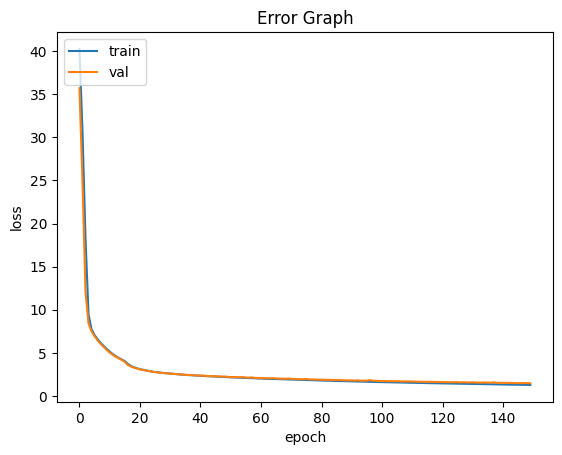

In [83]:
plot_losses_v2(history, loss)

In [84]:
# X_train, X_test, y_train, y_test

score = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

137/137 - 0s - loss: 1.3873 - rmse: 1.3872 - 239ms/epoch - 2ms/step
Test loss: 1.3873157501220703
Test accuracy: 1.387189269065857


In [85]:
score

[1.3873157501220703, 1.387189269065857]

### 2.7 Exportar y guardar el Modelo

Por último, una vez entrenado nuestro modelo es importante guardarlo, para esto utilizaremos la función `save_model` de keras

In [88]:
model.save('model_tarea1_v2.keras')

Para la entrega de la tarea, el modelo creado tiene que ser subido junto al jupyter notebook completado al github, ya sea en .keras o en un archivo .zip, el modelo será cargado y evaluado para comprobar su correcto funcionamiento, se recomienda probar el guardar y cargar el modelo en el mismo notebook para verificar que no hayan errores.